<a href="https://colab.research.google.com/github/othoni-hub/ECG2/blob/main/Ch05_TD_Ex1_Appartements.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CPGE-ECG2** 




## **Ch5 - Notebook : Statistiques bivariées : exercice "Appartements"**

<img src="https://drive.google.com/uc?id=12Wo3LubGGT4qOvYFAuLP4CyCuwjKNVuk" width="230" height="150" align = "right"/>




**O.Thöni - Lycée Saint-Charles Sainte Croix - LE MANS**

## **Étude du prix des loyers constatés, selon la surface, dans une base d'appartements parisiens.**

!["au mieux"…](https://poissonisfish.files.wordpress.com/2017/01/q7hip.gif?w=1108)



Les données sont importées depuis un fichier csv et stockées dans un dataFrame Pandas

In [1]:
import pandas as pd
import numpy as np


In [2]:
url = "https://raw.githubusercontent.com/othoni-hub/ECG2/main/APPART.csv"
# attention : import depuis Github : copier le "raw-github-link"
df = pd.read_csv(url, sep = " ") # le fichier importé est un fichier .csv, séparateur espace, converti en DataFrame Pandas
df.head()

,Surface,Loyer
0,28,650
1,50,1400
2,106,3250
3,196,4000
4,55,1340


In [3]:
surfaces = df['Surface']
loyers = df['Loyer']

In [4]:
surfaces


0      28
1      50
2     106
3     196
4      55
5     190
6     110
7      60
8      48
9      35
10     86
11     65
12     32
13     52
14     40
15    260
16     70
17    117
18     90
19     30
20    105
21     52
22     80
23     60
24    140
25     20
26    100
27     28
Name: Surface, dtype: int64

### **Calcul du point moyen**

In [5]:
x_bar = np.mean(surfaces)
x_bar

82.32142857142857

In [6]:
y_bar = np.mean(loyers)
y_bar

2056.0714285714284

### **visualisation du nuage de points**

In [7]:
import matplotlib.pyplot as plt     # matplotlib.pyplot permet de réaliser des graphiques

In [8]:
def centrax(xmin, xmax, ymin, ymax, titre, legende = [], axe_x = "", axe_y = ""):
    '''Cette procédure ajuste les paramètres graphiques : fenêtre (xmin, xmax, ymin, ymax), titre, légende (vide par défaut)'''
    # ajustement des paramètres des axes (centrage, couleur, etc.)
    ax = plt.gca()
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.legend(legende, loc = 'best')

    plt.xlim(xmin,xmax)   
    plt.ylim(ymin,ymax)         # fenêtre d'affichage
    plt.title(titre)            # titre du graphique au format LaTeX (encadré par des $)
    plt.xlabel(axe_x)           # nom des axes
    plt.ylabel(axe_y)

    plt.show()

In [9]:
# paramètres graphiques
xmin = -1
xmax = max(surfaces)
ymin = -1
ymax = max(loyers)
titre = "Prix des loyers constatés selon la surface de l'appartement"
axe_x = "Surfaces (m²)"
axe_y = "Prix des loyers (€)"



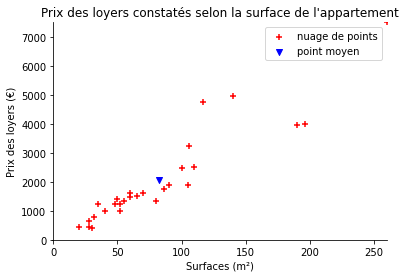

In [10]:
plt.scatter(surfaces,loyers,marker ='+',color = 'red')  # représentation graphique du nuage de points
plt.scatter(x_bar,y_bar,marker = "v", color = "blue")   # placement du point moyen
legende=['nuage de points', 'point moyen']
centrax(xmin, xmax, ymin, ymax, titre, legende, axe_x, axe_y)

On constate que le nuage de points est plutôt rectiligne, ce qui justifie l'emploi d'un ajustement **linéaire**, par la méthode des moindres carrés.

In [11]:
def droite(xx,a,b) :
    '''Cette fonction reçoit un vecteur d'abscisse, un coefficient directeur a et une ordonnée à l'origine b
    et trace la droite y = ax + b'''
    yy = [a*x + b for x in xx]
    plt.plot(xx,yy,color  ='blue', linewidth = 0.5)

**ajustement "au doigt mouillé"**

* On fixe "au pifomètre" une équation de droite d'ajustement

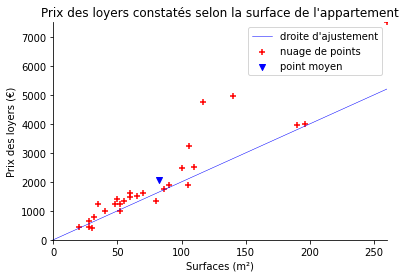

In [12]:
xx = [xmin,xmax]
a = 20
b = 0

plt.scatter(surfaces,loyers,marker ='+',color = 'red')  # représentation graphique du nuage de points
plt.scatter(x_bar,y_bar,marker = "v", color = "blue")   # placement du point moyen
droite(xx,a,b)

legende=["droite d'ajustement",'nuage de points', 'point moyen']
centrax(xmin, xmax, ymin, ymax, titre, legende, axe_x, axe_y)

* On calcule les prix ajustés, c'est-à-dire si l'on remplace le loyer réel constaté par l'ordonnée du point de la droite ayant la même abscisse.

In [13]:
def y_ajuste(xx,a,b):
    '''Cette fonction reçoit une liste xx, les coeeficients caractéristiques de la droite de régression
    et renvoie la liste des ordonnées ajustées sur cette droite'''
    yy = [a*x + b for x in xx]
    return yy

In [14]:
prix_ajustes = y_ajuste(surfaces,a,b)
prix_ajustes

[560,
 1000,
 2120,
 3920,
 1100,
 3800,
 2200,
 1200,
 960,
 700,
 1720,
 1300,
 640,
 1040,
 800,
 5200,
 1400,
 2340,
 1800,
 600,
 2100,
 1040,
 1600,
 1200,
 2800,
 400,
 2000,
 560]

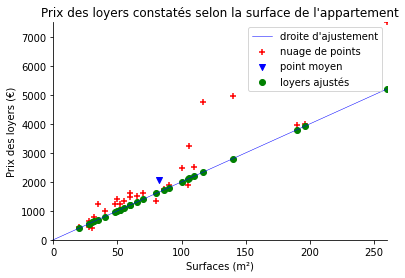

In [15]:
plt.scatter(surfaces,loyers,marker ='+',color = 'red')        # nuage de points
droite(xx,a,b)                                                          # droite d'ajustement
plt.scatter(x_bar,y_bar,marker = "v", color = "blue")                   # point moyen du nuage
plt.scatter(surfaces,prix_ajustes,marker ='o',color = 'green')   # volumes ajustés sur la droite

legende=["droite d'ajustement",'nuage de points','point moyen', 'loyers ajustés']
centrax(xmin, xmax, ymin, ymax, titre, legende, axe_x, axe_y)

* On calcule les **"résidus"** verticaux, c'est-à-dire la somme des carrés des distances entre les volumes réels constatés et les volumes ajustés.

In [49]:
def residus(y_reels,y_ajustes) : 
    '''Cette fonction reçoit deux listes : y_reels et y_ajustes, 
    et renvoie le "résidu" d'ajustement de la 1ère par la 2nde'''
    res = sum([(y_reels[k] - y_ajustes[k])**2 for k in range(len(y_reels))])
    return res

In [50]:
residus(loyers,prix_ajustes)

9824080.226442628

* on peut visualiser ces résidus

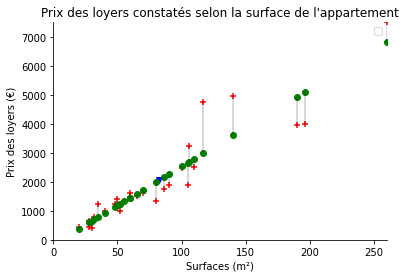

In [51]:
plt.scatter(surfaces,loyers,marker ='+',color = 'red')        # nuage de points
droite(xx,a,b)                                                          # droite d'ajustement
plt.scatter(x_bar,y_bar,marker = "v", color = "blue")                   # point moyen du nuage
plt.scatter(surfaces,prix_ajustes,marker ='o',color = 'green')   # volumes ajustés sur la droite
plt.plot([surfaces, surfaces],[loyers,prix_ajustes], color = "black", linewidth = 0.3)

centrax(xmin, xmax, ymin, ymax, titre,"",axe_x,axe_y)

## **graphique interactif**



In [52]:
from ipywidgets import interact
from IPython.display import display

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Intéragir sur les curseurs pour minimiser le résidu R affiché en haut à gauche.

In [53]:

def graph_interactif( a,b):
    prix_ajustes = y_ajuste(surfaces,a,b)
    
    plt.scatter(surfaces,loyers,marker ='+',color = 'red')        # nuage de points
    xx = [xmin,xmax]
    droite(xx,a,b)                                                # droite d'ajustement
    plt.scatter(x_bar,y_bar,marker = "v", color = "blue")         # point moyen du nuage
    plt.scatter(surfaces,prix_ajustes,marker ='o',color = 'green')# volumes ajustés sur la droite

    res = residus(loyers,prix_ajustes)

interact(graph_interactif, a = (-50, 50, 0.5), b = (-500, 500,20))

interactive(children=(FloatSlider(value=0.0, description='a', max=50.0, min=-50.0, step=0.5), IntSlider(value=…

<function __main__.graph_interactif>

* **Visualisation 3D du résidus en fonction des paramètres a et b**

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


Text(0.5, 0, 'z')

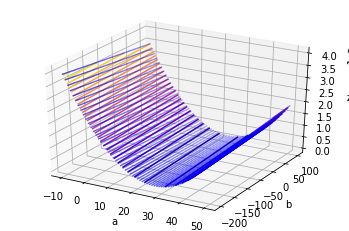

In [76]:
def residu(a,b) :
    prix_ajustes = y_ajuste(surfaces,a,b)
    res = residus(loyers, prix_ajustes)
    return res

A = np.linspace(-10, 50, 61)
B = np.linspace(-200,100,101)

X,Y = np.meshgrid(A,B)
Z = residu(X,Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 30, cmap='plasma')
ax.scatter(X,Y,Z,marker = '.', color = 'blue', s = 0.5)
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('z')

In [152]:
def graph_interactif( a,b):
    fig = plt.figure(figsize=(12,6))

    ax1 = fig.add_subplot(1, 2, 1)                      # 1ère sous-fenêtre
    prix_ajustes = y_ajuste(surfaces,a,b)
    ax1.scatter(surfaces,loyers,marker ='+',color = 'red')        # nuage de points
    xx = [0,250]
    yy = [a*x + b for x in xx]
    ax1.plot(xx,yy,color  ='blue', linewidth = 0.5)               # droite d'ajustement
    ax1.scatter(x_bar,y_bar,marker = "v", color = "blue")         # point moyen du nuage
    ax1.scatter(surfaces,prix_ajustes,marker ='o',color = 'green')# volumes ajustés sur la droite
    
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')     #2ème sous-fenêtre, 3D
    A = np.linspace(-10, 50, 21)
    B = np.linspace(-200,100,51)
    X,Y = np.meshgrid(A,B)
    Z = residu(X,Y)
    ax2.plot_surface(X, Y, Z, alpha = 0.7, rstride=1, cstride=1,linewidth=1)
    
    ax2.set_xlabel('a')
    ax2.set_ylabel('b')
    ax2.set_zlabel('R')
    ax2.scatter(a,b,residu(a,b), marker = 'o', color = 'red', s=20)
        
interact(graph_interactif, a = (-10, 50, 0.5), b = (-200, 100,20))

interactive(children=(FloatSlider(value=20.0, description='a', max=50.0, min=-10.0, step=0.5), IntSlider(value…

<function __main__.graph_interactif>

## **Calcul de la droite d'ajustement linéaire, droite de régression du prix des loyers en la surface**

**rappels**
* **covariance empirique :** 

$$s_{XY} = \frac{1}{n} \sum_{i = 1}^{n} \left ( x_i - \bar{x}\right)\left ( xy_i - \bar{y}\right)$$

* **coefficient directeur de la droite de régression de Y en X :**

$$ a = \frac{s_{XY}}{\sigma^2(X)}$$

* **ordonnée à l'origine de la droite de régression de Y en X**

$$ b = \bar{y} - a . \bar{x}$$

* **équation de la droite de régression de Y en X :**

$$y = a . x + b$$

In [21]:
def covariance_empirique(x,y) :
    '''Cette fonction reçoit deux listes x et y, de même taille, 
    et renvoie la covariance de ces deux listes
    Remarque : si x = y, on obtient la variance de x.'''
    xbar = np.mean(x)
    ybar = np.mean(y)
    n = len(x)

    s_XY = 1/n * sum([(x[k] - xbar)*(y[k] - ybar) for k in range(n)])
    return s_XY

In [22]:
s_XY = covariance_empirique(surfaces, loyers)
s_XY

84302.86989795917

In [23]:
def coeff_droite_regression(x,y):
    '''Cette fonction reçoit deux listes x et y de même taille,
    et renvoie les coefficients de la droite d'ajustemennt de y en x'''
    xbar = np.mean(x)
    ybar = np.mean(y)

    # pente
    a = covariance_empirique(x, y) / covariance_empirique(x, x)
    # ordonnée à l'origine
    b = ybar - a * xbar
    return a, b

In [24]:
a,b = coeff_droite_regression(surfaces, loyers)
print('Équation de la droite de régression de Y en X : y=' + str(a) + '.x + ' + str(b))

Équation de la droite de régression de Y en X : y=26.765817999508364.x + -147.32894603095656


**Représentation graphique**

In [25]:
prix_ajustes = y_ajuste(surfaces,a,b)
#prix_ajustes

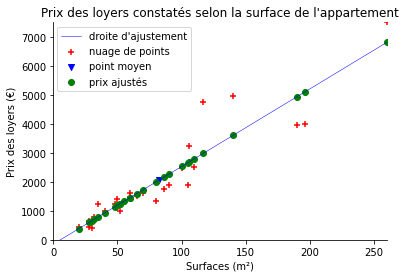

In [26]:
plt.scatter(surfaces,loyers,marker ='+',color = 'red')                  # nuage de points
droite(xx,a,b)                                                          # droite d'ajustement
plt.scatter(x_bar,y_bar,marker = "v", color = "blue")                   # point moyen du nuage
plt.scatter(surfaces,prix_ajustes,marker ='o',color = 'green')          # prix ajustés sur la droite

legende=["droite d'ajustement",'nuage de points','point moyen', 'prix ajustés']
centrax(xmin, xmax, ymin, ymax, titre, legende, axe_x, axe_y)

On observe que la droite de régression de Y en X passe bien par le point moyen !

In [27]:
residus(loyers,prix_ajustes)

9824080.226442628

On a optimisé ces résidus.

### **Interpolation et extrapolations linéaires**

* Par interpolation, indiquer le prix du loyer à prévoir pour une surface de 250 m². 



In [28]:
x = 250
y = a*x + b
print("Pour un appartement de " + str(x) + " m², prévoir un loyer de : " + str(np.round(y*100)/100) + ' €')

Pour un appartement de 250 m², prévoir un loyer de : 6544.13 €


### **Regression de la surface en le prix du loyer**

Il nous faut calculer l'autre droite de regression, car les résidus sont cette fois pris horizontalement.

In [29]:
a,b = coeff_droite_regression(loyers, surfaces)
a_prim = 1/a
b_prim = y_bar - a_prim * x_bar
print('Équation de la droite de régression de Y en X : y=' + str(a_prim) + '.x + ' + str(b_prim))


Équation de la droite de régression de Y en X : y=30.927716740463694.x + -489.94239595602903


In [30]:
y = 5000
x = (y - b_prim) / a_prim
print("Pour un loyer de : " + str(np.round(y*100)/100) + ' €, on peut espérer un appartement de ' + str(np.round(x)) + " m².")

Pour un loyer de : 5000.0 €, on peut espérer un appartement de 178.0 m².


# **Intelligence artificielle : Calcul de la droite de regression par une descente de gradient**

* les données

In [31]:
# Fabrique le numpy array X, contenant les valeurs de Surface.
# et le vecteur de sortie y, contenant les valeurs de Loyer.
X = np.array(surfaces)
y = np.array(loyers)

m = len(X)

* création du modèle

In [32]:
def predict(w, b, X):
    """ A method that runs our linear model
    w : np.ndarray (1, num_dimensions)
        A weight matrix which will be fit to the data
    b : float (1, 1)
        The bias unit for our linear model
    X : np.ndarray (num_dimensions, num_examples)
        The m input examples for which we would like to predict a y value
    """
    return w * X + b
 


* coût (erreur ou *loss*)

In [33]:
def cost(y, y_pred):
    """
    y : np.ndarray (num_examples, 1)
        The ground truth results
    y_pred : np.ndarray (num_examples, 1)
    """
    return np.sqrt(((y_pred - y) ** 2).mean())


### **Implémentation de la descente de gradient**
On veut observer l'effet d'une variation des paramètres sur le coût, en mathématiques, cela s'appelle calculer la dérivée de la fonction de coût ! (pas compliquée ici puisqu'on dérive un carré...)

![Formule de la descente de gradient](https://drive.google.com/uc?id=1TaSb_ce-rny-1asU3YNQFDA-6Q6uwKpB)

a (alpha) désigne le **"taux d'apprentissage"** (*Learning Ratio*), trop lent, on ne convergera pas assez vers la solution optimale, trop rapide, on oscillera autour...

* Le gradient

In [41]:
def gradient(X, y, y_pred):
    """
    X : np.ndarray (num_dimensions, num_examples)
        The m input examples for which we would like to predict a y value
    y : np.ndarray (num_examples, 1)
        The ground truth results
    y_pred : np.ndarray (num_examples, 1)
        Our model's predictions
    """
    dw = ((y_pred - y) * X).mean()/cost(y,y_pred)
    db = (y_pred - y).mean()/cost(y,y_pred)
    return dw, db
 


* L'optimisation par descente de gradient


In [42]:
def gradient_descent(X, y, w, b, epochs, learning_ratio):
    """
    X : np.ndarray (num_dimensions, num_examples)
        The m input examples for which we would like to predict a y value
    y : np.ndarray (num_examples, 1)
        The ground truth results
    w : np.ndarray (1, num_dimensions)
        A weight matrix which will be fit to the data
    b : float
        The bias unit for our linear model
    epochs : int
        The number of times our model iterates over the entire training set
    learning_rate : float
        The rate at which our model tends to adjust it's parameters
    """

    for i in range(epochs):
        # predict the value of y with our current model
        y_pred = predict(w, b, X)
        
        # compute the gradient with respect to w and b
        dw, db = gradient(X, y, y_pred)
        
        # adjust w and b as to minimize the cost function
        w = w - learning_ratio * dw
        b = b - learning_ratio * db

        # cost
        l = cost(y,y_pred)
        loss_history.append(l)
        w_history.append(w)
        b_history.append(b)
        absc.append(i)

    return w, b


* Initialisation des paramètres

In [43]:
def initialize_parameters(n):
    """
    n : int
        The dimensions of the data
    """
    return np.zeros((1, n)), 0
 


* Exécution

In [44]:
# initialize w and b
w, b = initialize_parameters(m)

#initialize histories
loss_history = []
w_history = []
b_history = []
absc = []
        
# run gradient descent in order to find optimal values for w and b
epochs=100000
learning_ratio=0.1
w, b = gradient_descent(X, y, w, b, epochs, learning_ratio)

# calculate the final cost function
c = cost(y, predict(w, b, X))
    
# print out the model details
print('w:', w[0][0])
print('b:', b)
print('cost:', c)


w: 26.760016853839343
b: -146.62945592571782
cost: 592.3345029092997


observation de la convergence des poids de la régression 

Text(0, 0.5, 'biais')

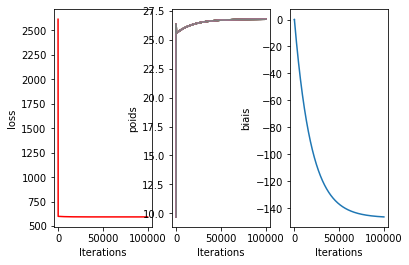

In [45]:


# graphics
plt.subplot(1,3,1)
plt.plot(range(epochs),loss_history,'r')
plt.xlabel("Iterations")
plt.ylabel("loss")

plt.subplot(1,3,2)
plt.plot(range(epochs), np.mean(w_history, axis = 1))
plt.xlabel("Iterations")
plt.ylabel("poids")

plt.subplot(1,3,3)
plt.plot(range(epochs), b_history)
plt.xlabel("Iterations")
plt.ylabel("biais")


On voit que l'erreur (*loss*) a diminué et atteint (presque) son minimum très rapidement, et que le paramètre $a$ a convergé très vite, le reste du temps a été employé a un réglage fin du paramètre $b$.
Ceci s'explique par la forte différence d'échelle entre les valeurs des surfaces et celles des loyers.

In [46]:
epochs

100000

**Affichage de l'hypothèse finale**

[[ 602.65101598 1191.37138677 2689.93233058 5098.33384743 1325.17147104
  4937.7737463  2796.972398   1458.9715553  1137.85135306  789.97113396
  2154.7319935  1592.77163957  709.6910834  1244.89142047  923.77121823
  6810.97492607 1726.57172384 2984.29251597 2261.77206092  656.17104969
  2663.17231373 1244.89142047 1994.17189238 1458.9715553  3599.77290361
   388.57088115 2529.37222946  602.65101598]]


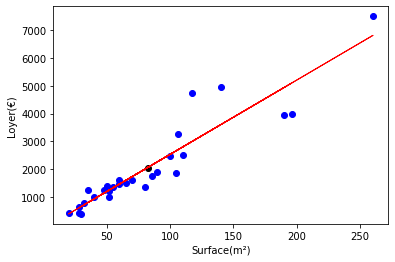

In [47]:

# Plot training set
plt.scatter(X, y ,  color='blue')

# Plot Hypothesis (theta were calculated with the Gradient Descent)

y_pred =w*X+b
print(y_pred)

plt.plot(X, y_pred.T, color='red', linewidth=1)
# Plot costs
#for k in range(m):
#   plt.plot([X[k], X[k]],[y[k],y_pred[k]],'g--', linewidth=1 )

# Mean Point
plt.scatter(np.mean(X),np.mean(y), color='black')

# Put labels
plt.xlabel("Surface(m²)")
plt.ylabel("Loyer(€)")

plt.show()
